In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
data = pd.read_csv('diabetes_prediction_dataset.csv')

In [ ]:
# Display the first few records of the dataset
print(data.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [ ]:
# Data Exploration
# Data Dimension
print("Data Dimension:", data.shape)

# Data Information
print("\nData Information:")
print(data.info())

# Statistics Information
print("\nStatistics Information:")
print(data.describe())

Data Dimension: (100000, 9)

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None

Statistics Information:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      

In [ ]:
# Checking for null values
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
# Data preprocessing
# Convert categorical variables into numerical using one-hot encoding
data = pd.get_dummies(data, columns=['gender', 'smoking_history'])

# Split features (X) and target variable (y)
X = data.drop('diabetes', axis=1)
y = data['diabetes']

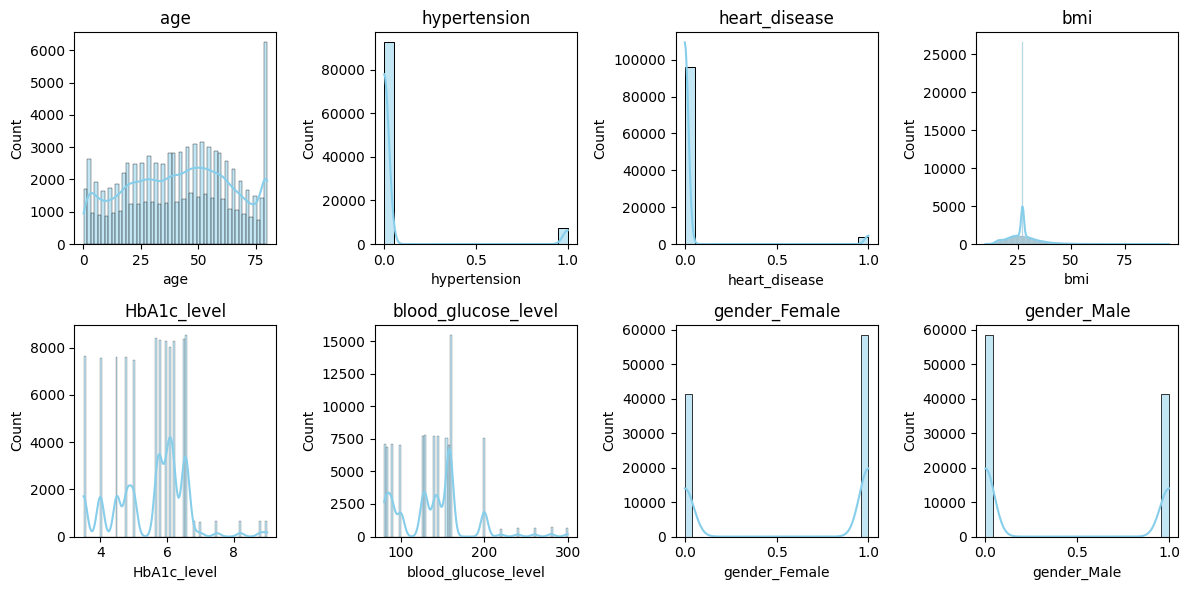

In [ ]:
# EDA Visualization -1
# Feature Distributions
plt.figure(figsize=(12, 6))
for i, col in enumerate(X.columns[:8]):
    plt.subplot(2, 4, i+1)
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

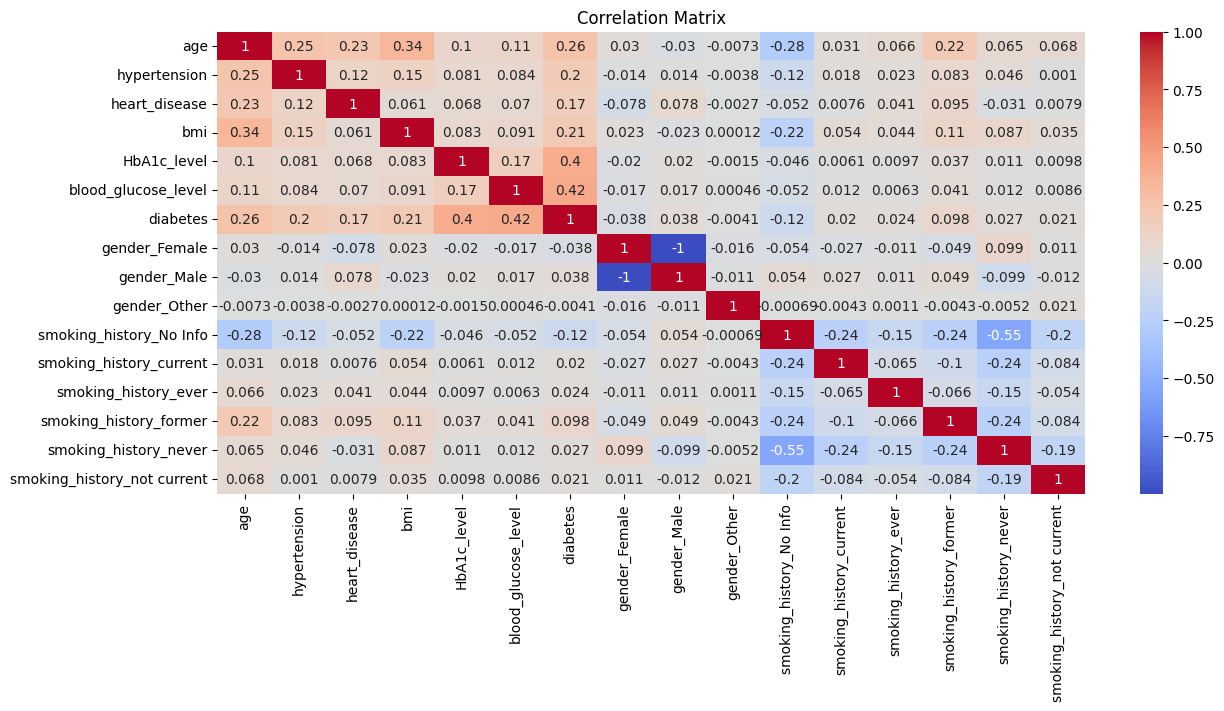

In [ ]:
# EDA Visualization -2
# Correlation Matrix
plt.figure(figsize=(14, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

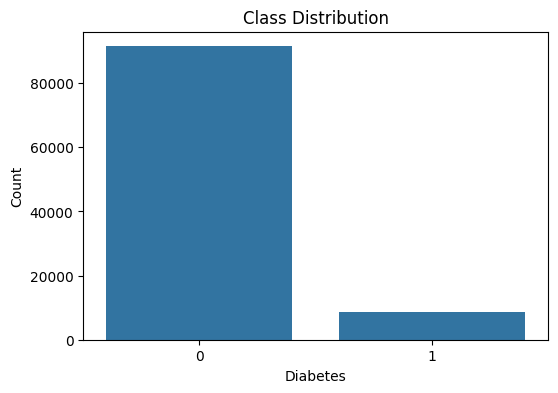

In [ ]:
# EDA Visualization -3
# Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes', data=data)
plt.title('Class Distribution')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

In [ ]:
# Data Preprocessing
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Logistic Regression Accuracy: 0.959
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.86      0.62      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



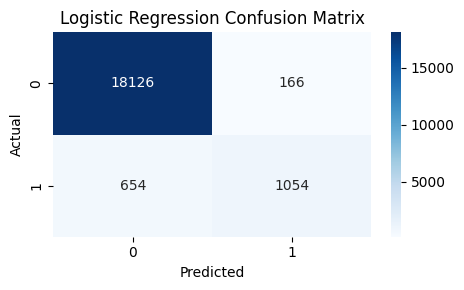


Random Forest Classifier Accuracy: 0.9701
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



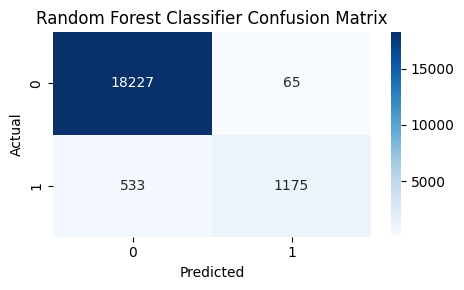

In [ ]:
# Model training
# Logistic Regression
logistic_reg_model = LogisticRegression(random_state=42)
logistic_reg_model.fit(X_train_scaled, y_train)

# Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

# Model evaluation -1
# Logistic Regression
logistic_reg_predictions = logistic_reg_model.predict(X_test_scaled)
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_predictions)
print("\nLogistic Regression Accuracy:", logistic_reg_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_reg_predictions))

# Visualization
# Confusion Matrix for Logistic Regression
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
logistic_reg_conf_matrix = confusion_matrix(y_test, logistic_reg_predictions)
sns.heatmap(logistic_reg_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Model evaluation -2
# Random Forest Classifier
random_forest_predictions = random_forest_model.predict(X_test_scaled)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
print("\nRandom Forest Classifier Accuracy:", random_forest_accuracy)
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, random_forest_predictions))

# Visualization
# Confusion Matrix for Random Forest Classifier
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 2)
random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predictions)
sns.heatmap(random_forest_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()
